In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [2]:
def BGR2RGB (image):
    
    RGBImage = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    return RGBImage

In [0]:
from google.colab import files
uploaded = files.upload()

Saving view1.png to view1 (2).png


In [0]:
from google.colab import files
uploaded = files.upload()

Saving view5.png to view5 (2).png


C:\Users\Yahia\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


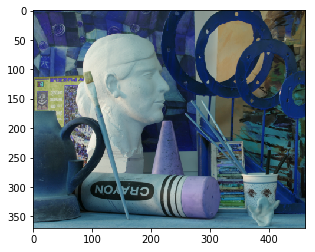

In [92]:
#read the input images of the 2 views as gray-scale images
img1 = cv.imread('view1.png')
plt.grid("false")
img = BGR2RGB (img1)
plt.imshow(img1)
# img_rght = cv2.imread('view5.png', 0)

C:\Users\Yahia\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


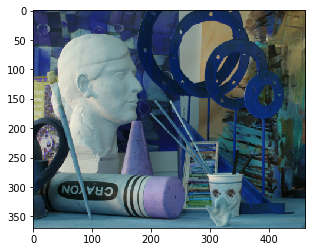

In [93]:
img2 = cv.imread('view5.png')
plt.grid("false")
img = BGR2RGB (img2)
plt.imshow(img2)

In [5]:
img_lft_padded = cv2.copyMakeBorder(img1, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0);
img_rght_padded = cv2.copyMakeBorder(img2, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0);

In [6]:
width, height, z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(1, width - 1):
    for j in range(1, height - 1):
        current_block_lft = img_lft_padded[i - 1:i + 2, j - 1:j + 2]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 1:
                idx = 1
            current_ssd = np.sum(np.square(np.subtract(current_block_lft, img_rght_padded[i - 1:i + 2, idx - 1:idx + 2])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

In [ ]:
width, height, z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(1, width - 1):
    for j in range(1, height - 1):
        current_block_lft = img_lft_padded[i - 1:i + 2, j - 1:j + 2]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 1:
                idx = 1
            current_ssd = np.sum(np.square(np.subtract(current_block_lft, img_rght_padded[i - 1:i + 2, idx - 1:idx + 2])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

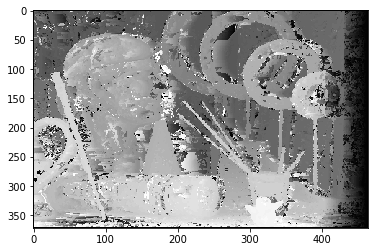

In [8]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

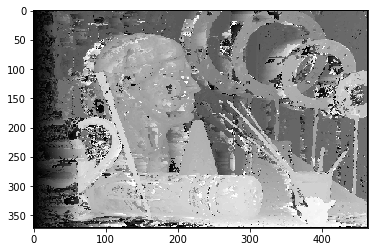

In [73]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [74]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(1, width - 1):
    for j in range(1, height - 1):
        current_block_rght = img_rght_padded[i - 1:i + 2, j - 1:j + 2]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-1:
                idx = height-2
            current_ssd = np.sum(np.absolute(np.subtract(current_block_rght, img_lft_padded[i - 1:i + 2, idx - 1:idx + 2])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

In [75]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(1, width - 1):
    for j in range(1, height - 1):
        current_block_rght = img_rght_padded[i - 1:i + 2, j - 1:j + 2]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-1:
                idx = height-2
            current_ssd = np.sum(np.absolute(np.subtract(current_block_rght, img_lft_padded[i - 1:i + 2, idx - 1:idx + 2])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

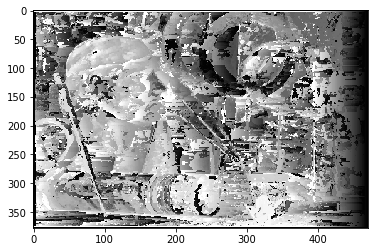

In [76]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

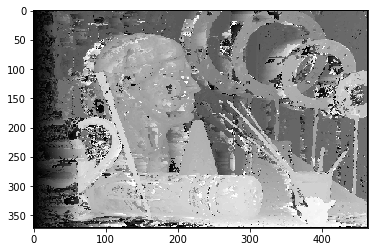

In [77]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [112]:
img_lft_padded = cv2.copyMakeBorder(img1, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);
img_rght_padded = cv2.copyMakeBorder(img2, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);

In [114]:
width, height,z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(3, width - 2):
    for j in range(3, height - 2):
        current_block_lft = img_lft_padded[i-2:i+3, j-2:j+3]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 3:
                idx = 3
            current_ssd = np.sum(np.absolute(np.subtract(current_block_lft, img_rght_padded[i-2:i+3, idx-2:idx+3])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

In [116]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(3, width - 2):
    for j in range(3, height - 2):
        current_block_rght = img_rght_padded[i-2:i+3, j-2:j+3]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-3:
                idx = height-4
            current_ssd = np.sum(np.absolute(np.subtract(current_block_rght, img_lft_padded[i-2:i+3, idx-2:idx+3])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

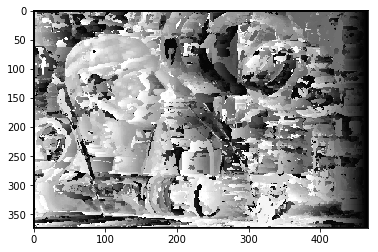

In [117]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

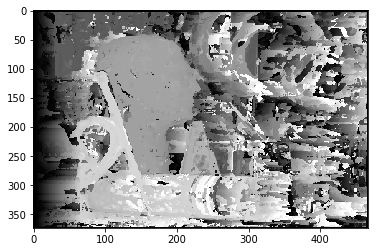

In [118]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [119]:
width, height,z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(3, width - 2):
    for j in range(3, height - 2):
        current_block_lft = img_lft_padded[i-2:i+3, j-2:j+3]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 3:
                idx = 3
            current_ssd = np.sum(np.square(np.subtract(current_block_lft, img_rght_padded[i-2:i+3, idx-2:idx+3])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

In [120]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(3, width - 2):
    for j in range(3, height - 2):
        current_block_rght = img_rght_padded[i-2:i+3, j-2:j+3]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-3:
                idx = height-4
            current_ssd = np.sum(np.square(np.subtract(current_block_rght, img_lft_padded[i-2:i+3, idx-2:idx+3])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

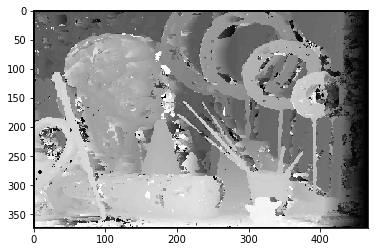

In [121]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

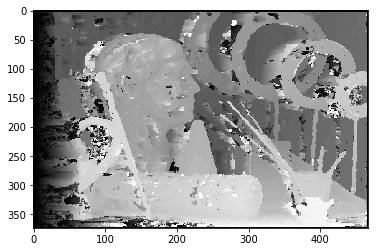

In [122]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [101]:
img_lft_padded = cv2.copyMakeBorder(img1, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0);
img_rght_padded = cv2.copyMakeBorder(img2, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0);

In [102]:
img_rght_padded.shape

(378, 471, 3)

In [103]:
width, height,z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(5, width - 4):
    for j in range(5, height - 4):
        current_block_lft = img_lft_padded[i-4:i+5, j-4:j+5]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 5:
                idx = 5
            current_ssd = np.sum(np.absolute(np.subtract(current_block_lft, img_rght_padded[i-4:i+5, idx-4:idx+5])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

In [104]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(5, width - 4):
    for j in range(5, height - 4):
        current_block_rght = img_rght_padded[i-4:i+5, j-4:j+5]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-5:
                idx = height-6
            current_ssd = np.sum(np.absolute(np.subtract(current_block_rght, img_lft_padded[i-4:i+5, idx-4:idx+5])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

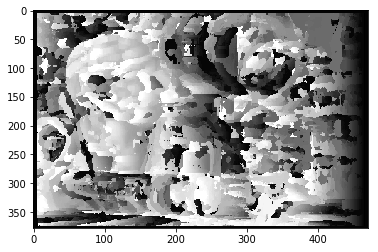

In [105]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

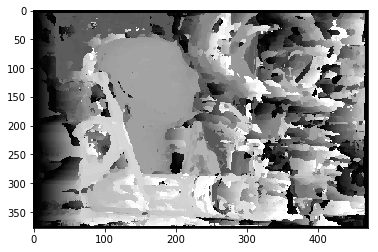

In [106]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [107]:
width, height, z = img_lft_padded.shape
disp_map_lft = np.zeros((width, height))
for i in range(5, width - 4):
    for j in range(5, height - 4):
        current_block_lft = img_lft_padded[i-4:i+5, j-4:j+5]
        match_lft = 0
        min_ssdlft = math.inf # initialize left image min ssd as maximum value of int in numpy
        for idx in range(j - 75, j):
            # to avoid over-flow error while slicing right view image into blocks
            if idx < 5:
                idx = 5
            current_ssd = np.sum(np.square(np.subtract(current_block_lft, img_rght_padded[i-4:i+5, idx-4:idx+5])))
            
            if float(current_ssd) < min_ssdlft:
                min_ssdlft = current_ssd
                match_lft = idx

        disp_map_lft[i][j] = j - match_lft

In [108]:
width, height, z = img_rght_padded.shape
disp_map_rght = np.zeros((width, height))
for i in range(5, width - 4):
    for j in range(5, height - 4):
        current_block_rght = img_rght_padded[i-4:i+5, j-4:j+5]
        match_rght = 0
        min_ssdrght = math.inf  # initialize right image min ssd as maximum value of int in numpy
        for idx in range(j + 75, j, -1):
            #to avoid over-flow error while slicing left view image into blocks
            if idx >= height-5:
                idx = height-6
            current_ssd = np.sum(np.square(np.subtract(current_block_rght, img_lft_padded[i-4:i+5, idx-4:idx+5])))

            if float(current_ssd) < min_ssdrght:
                min_ssdrght = current_ssd
                match_rght = idx

        disp_map_rght[i][j] = match_rght - j

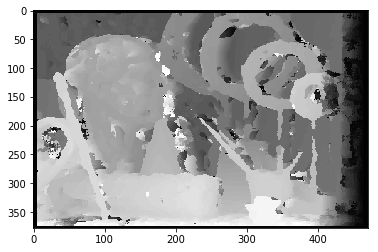

In [109]:
plt.imshow(disp_map_rght,cmap = 'gray', aspect='auto')

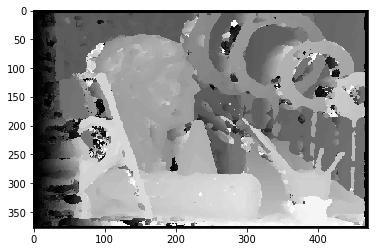

In [110]:
plt.imshow(disp_map_lft,cmap = 'gray', aspect='auto')

In [111]:
img_lft_padded.shape

(378, 471, 3)

In [63]:
from math import pow
#img1=RGB2Greyscale(img1)
#img2=RGB2Greyscale(img2)
rightImg = img1
leftImg = img2
rows = img1.shape[0]
cols = img2.shape[1]

# Matrices to store disparities : left and right
leftDisp=np.zeros((rows,cols))
rightDisp=np.zeros((rows,cols))

occ = 7
aplha = 2

# Pick a row in the image to be matched
for c in range (0,rows):
    # Cost matrix 
    print("CCCCCCCCCCCCCCCCCCCCCCCC"+ "   " + str(c))
    colMat=np.zeros((cols,cols))

    # Disparity path matrix
    dispMat=np.zeros((cols,cols))

    # Initialize the cost matrix 
    for i in range(0,cols):
        colMat[i][0] = i*occ
        colMat[0][i] = i*occ

    # Iterate the row in both the images to find the path using dynamic programming
    # Progamme is similar to LCS(Longest common subsequence)

    for k in range(0,cols):
        for j in range(0,cols):
            match_cost=pow((rightImg[c][j]-leftImg[c][k]),2)
            #print(str(k) + "  " + str(j))

            # Finding minimum cost    
            min1=colMat[k-1][j-1]+match_cost
            min2=colMat[k-1][j]+occ
            min3=colMat[k][j-1]+occ



            colMat[k][j]=cmin=min(min1,min2,min3)

            # Marking the path 
            if(min1==cmin):
                dispMat[k][j]=1
            if(min2==cmin):
                dispMat[k][j]=2
            if(min3==cmin):
                dispMat[k][j]=3

    # Iterate the matched path and update the disparity value
    i=cols-1
    j=cols-1

    while (i!=0) and  (j!=0):
        if(dispMat[i][j]==1):
            leftDisp[c][i]=np.absolute(i-j)
            rightDisp[c][j]=np.absolute(j-i)
            i=i-1
            j=j-1
        elif(dispMat[i][j]==2):
            leftDisp[c][i]=0
            i=i-1
        elif(dispMat[i][j]==3):
            rightDisp[c][j]=0
            j=j-1


CCCCCCCCCCCCCCCCCCCCCCCC   0


C:\Users\Yahia\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars


CCCCCCCCCCCCCCCCCCCCCCCC   1
CCCCCCCCCCCCCCCCCCCCCCCC   2
CCCCCCCCCCCCCCCCCCCCCCCC   3
CCCCCCCCCCCCCCCCCCCCCCCC   4
CCCCCCCCCCCCCCCCCCCCCCCC   5
CCCCCCCCCCCCCCCCCCCCCCCC   6
CCCCCCCCCCCCCCCCCCCCCCCC   7
CCCCCCCCCCCCCCCCCCCCCCCC   8
CCCCCCCCCCCCCCCCCCCCCCCC   9
CCCCCCCCCCCCCCCCCCCCCCCC   10
CCCCCCCCCCCCCCCCCCCCCCCC   11
CCCCCCCCCCCCCCCCCCCCCCCC   12
CCCCCCCCCCCCCCCCCCCCCCCC   13
CCCCCCCCCCCCCCCCCCCCCCCC   14
CCCCCCCCCCCCCCCCCCCCCCCC   15
CCCCCCCCCCCCCCCCCCCCCCCC   16
CCCCCCCCCCCCCCCCCCCCCCCC   17
CCCCCCCCCCCCCCCCCCCCCCCC   18
CCCCCCCCCCCCCCCCCCCCCCCC   19
CCCCCCCCCCCCCCCCCCCCCCCC   20
CCCCCCCCCCCCCCCCCCCCCCCC   21
CCCCCCCCCCCCCCCCCCCCCCCC   22
CCCCCCCCCCCCCCCCCCCCCCCC   23
CCCCCCCCCCCCCCCCCCCCCCCC   24
CCCCCCCCCCCCCCCCCCCCCCCC   25
CCCCCCCCCCCCCCCCCCCCCCCC   26
CCCCCCCCCCCCCCCCCCCCCCCC   27
CCCCCCCCCCCCCCCCCCCCCCCC   28
CCCCCCCCCCCCCCCCCCCCCCCC   29
CCCCCCCCCCCCCCCCCCCCCCCC   30
CCCCCCCCCCCCCCCCCCCCCCCC   31
CCCCCCCCCCCCCCCCCCCCCCCC   32
CCCCCCCCCCCCCCCCCCCCCCCC   33
CCCCCCCCCCCCCCCCCCC

CCCCCCCCCCCCCCCCCCCCCCCC   269
CCCCCCCCCCCCCCCCCCCCCCCC   270
CCCCCCCCCCCCCCCCCCCCCCCC   271
CCCCCCCCCCCCCCCCCCCCCCCC   272
CCCCCCCCCCCCCCCCCCCCCCCC   273
CCCCCCCCCCCCCCCCCCCCCCCC   274
CCCCCCCCCCCCCCCCCCCCCCCC   275
CCCCCCCCCCCCCCCCCCCCCCCC   276
CCCCCCCCCCCCCCCCCCCCCCCC   277
CCCCCCCCCCCCCCCCCCCCCCCC   278
CCCCCCCCCCCCCCCCCCCCCCCC   279
CCCCCCCCCCCCCCCCCCCCCCCC   280
CCCCCCCCCCCCCCCCCCCCCCCC   281
CCCCCCCCCCCCCCCCCCCCCCCC   282
CCCCCCCCCCCCCCCCCCCCCCCC   283
CCCCCCCCCCCCCCCCCCCCCCCC   284
CCCCCCCCCCCCCCCCCCCCCCCC   285
CCCCCCCCCCCCCCCCCCCCCCCC   286
CCCCCCCCCCCCCCCCCCCCCCCC   287
CCCCCCCCCCCCCCCCCCCCCCCC   288
CCCCCCCCCCCCCCCCCCCCCCCC   289
CCCCCCCCCCCCCCCCCCCCCCCC   290
CCCCCCCCCCCCCCCCCCCCCCCC   291
CCCCCCCCCCCCCCCCCCCCCCCC   292
CCCCCCCCCCCCCCCCCCCCCCCC   293
CCCCCCCCCCCCCCCCCCCCCCCC   294
CCCCCCCCCCCCCCCCCCCCCCCC   295
CCCCCCCCCCCCCCCCCCCCCCCC   296
CCCCCCCCCCCCCCCCCCCCCCCC   297
CCCCCCCCCCCCCCCCCCCCCCCC   298
CCCCCCCCCCCCCCCCCCCCCCCC   299
CCCCCCCCCCCCCCCCCCCCCCCC   300
CCCCCCCC

In [29]:
def RGB2Greyscale(image):
    """
    Converts an RGB image to grayscale.
    :return:
        The grayscale image.
    """  
    greyImage = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    return greyImage

In [30]:
print(img1.shape)
# img1=BGR2RGB(img1)
# img1.shape
#img1=RGB2Greyscale(img1)
# img2=BGR2RGB(img2)
#img2=RGB2Greyscale(img2)

stereoMatching(img1,img2)

(370, 463)
CCCCCCCCCCCCCCCCCCCCCCCC   0


C:\Users\Yahia\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars


CCCCCCCCCCCCCCCCCCCCCCCC   1
CCCCCCCCCCCCCCCCCCCCCCCC   2
CCCCCCCCCCCCCCCCCCCCCCCC   3
CCCCCCCCCCCCCCCCCCCCCCCC   4
CCCCCCCCCCCCCCCCCCCCCCCC   5
CCCCCCCCCCCCCCCCCCCCCCCC   6
CCCCCCCCCCCCCCCCCCCCCCCC   7
CCCCCCCCCCCCCCCCCCCCCCCC   8
CCCCCCCCCCCCCCCCCCCCCCCC   9
CCCCCCCCCCCCCCCCCCCCCCCC   10
CCCCCCCCCCCCCCCCCCCCCCCC   11
CCCCCCCCCCCCCCCCCCCCCCCC   12
CCCCCCCCCCCCCCCCCCCCCCCC   13
CCCCCCCCCCCCCCCCCCCCCCCC   14
CCCCCCCCCCCCCCCCCCCCCCCC   15
CCCCCCCCCCCCCCCCCCCCCCCC   16
CCCCCCCCCCCCCCCCCCCCCCCC   17
CCCCCCCCCCCCCCCCCCCCCCCC   18
CCCCCCCCCCCCCCCCCCCCCCCC   19
CCCCCCCCCCCCCCCCCCCCCCCC   20
CCCCCCCCCCCCCCCCCCCCCCCC   21
CCCCCCCCCCCCCCCCCCCCCCCC   22
CCCCCCCCCCCCCCCCCCCCCCCC   23
CCCCCCCCCCCCCCCCCCCCCCCC   24
CCCCCCCCCCCCCCCCCCCCCCCC   25
CCCCCCCCCCCCCCCCCCCCCCCC   26
CCCCCCCCCCCCCCCCCCCCCCCC   27
CCCCCCCCCCCCCCCCCCCCCCCC   28
CCCCCCCCCCCCCCCCCCCCCCCC   29
CCCCCCCCCCCCCCCCCCCCCCCC   30
CCCCCCCCCCCCCCCCCCCCCCCC   31
CCCCCCCCCCCCCCCCCCCCCCCC   32
CCCCCCCCCCCCCCCCCCCCCCCC   33
CCCCCCCCCCCCCCCCCCC

CCCCCCCCCCCCCCCCCCCCCCCC   269
CCCCCCCCCCCCCCCCCCCCCCCC   270
CCCCCCCCCCCCCCCCCCCCCCCC   271
CCCCCCCCCCCCCCCCCCCCCCCC   272
CCCCCCCCCCCCCCCCCCCCCCCC   273
CCCCCCCCCCCCCCCCCCCCCCCC   274
CCCCCCCCCCCCCCCCCCCCCCCC   275
CCCCCCCCCCCCCCCCCCCCCCCC   276
CCCCCCCCCCCCCCCCCCCCCCCC   277
CCCCCCCCCCCCCCCCCCCCCCCC   278
CCCCCCCCCCCCCCCCCCCCCCCC   279
CCCCCCCCCCCCCCCCCCCCCCCC   280
CCCCCCCCCCCCCCCCCCCCCCCC   281
CCCCCCCCCCCCCCCCCCCCCCCC   282
CCCCCCCCCCCCCCCCCCCCCCCC   283
CCCCCCCCCCCCCCCCCCCCCCCC   284
CCCCCCCCCCCCCCCCCCCCCCCC   285
CCCCCCCCCCCCCCCCCCCCCCCC   286
CCCCCCCCCCCCCCCCCCCCCCCC   287
CCCCCCCCCCCCCCCCCCCCCCCC   288
CCCCCCCCCCCCCCCCCCCCCCCC   289
CCCCCCCCCCCCCCCCCCCCCCCC   290
CCCCCCCCCCCCCCCCCCCCCCCC   291
CCCCCCCCCCCCCCCCCCCCCCCC   292
CCCCCCCCCCCCCCCCCCCCCCCC   293
CCCCCCCCCCCCCCCCCCCCCCCC   294
CCCCCCCCCCCCCCCCCCCCCCCC   295
CCCCCCCCCCCCCCCCCCCCCCCC   296
CCCCCCCCCCCCCCCCCCCCCCCC   297
CCCCCCCCCCCCCCCCCCCCCCCC   298
CCCCCCCCCCCCCCCCCCCCCCCC   299
CCCCCCCCCCCCCCCCCCCCCCCC   300
CCCCCCCC

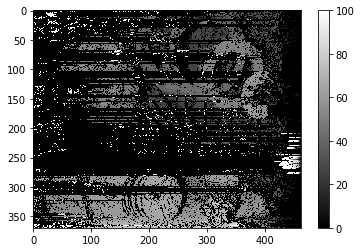

In [67]:
plt.imshow(leftDisp,cmap = 'gray', aspect='auto', vmax = 100)
plt.colorbar()

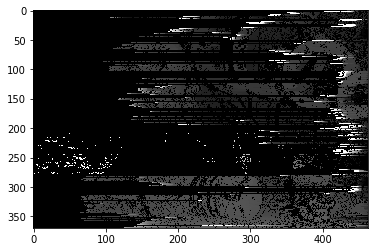

In [71]:
plt.imshow(rightDisp,cmap = 'gray', aspect='auto',vmax = 200)

In [0]:
        for k in range (0,cols):
            for j in range(0,cols):
        
            